<a href="https://colab.research.google.com/github/navicester/TianChi-SJTU-Boot-Camp/blob/main/5%E3%80%81%E5%AE%9E%E6%88%98%E7%BB%83%E4%B9%A0%EF%BC%88%E4%B8%80%EF%BC%89/%E8%AF%BE%E6%97%B627%20%E8%B5%84%E9%87%91%E6%B5%81%E5%85%A5%E6%B5%81%E5%87%BA%E9%A2%84%E6%B5%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 加载数据

In [20]:
!wget https://github.com/navicester/TianChi-SJTU-Boot-Camp/raw/main/data/Purchase_Redemption_Data.zip

--2022-06-16 08:52:52--  https://github.com/navicester/TianChi-SJTU-Boot-Camp/raw/main/data/Purchase_Redemption_Data.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/navicester/TianChi-SJTU-Boot-Camp/main/data/Purchase_Redemption_Data.zip [following]
--2022-06-16 08:52:53--  https://raw.githubusercontent.com/navicester/TianChi-SJTU-Boot-Camp/main/data/Purchase_Redemption_Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24841181 (24M) [application/zip]
Saving to: ‘Purchase_Redemption_Data.zip’

Purchase_Redemption 100%[===================>]  23.69M  --.-KB/s    in 0.08s   

2022-06-16 

In [21]:
!unzip Purchase_Redemption_Data.zip -d ../data/

Archive:  Purchase_Redemption_Data.zip
   creating: ../data/Purchase_Redemption_Data/
  inflating: ../data/Purchase_Redemption_Data/comp_predict_table.csv  
  inflating: ../data/Purchase_Redemption_Data/mfd_bank_shibor.csv  
  inflating: ../data/Purchase_Redemption_Data/mfd_day_share_interest.csv  
  inflating: ../data/Purchase_Redemption_Data/user_balance_table.csv  
  inflating: ../data/Purchase_Redemption_Data/user_profile_table.csv  


In [22]:
!mv ../data/Purchase_Redemption_Data/* ../data/

In [23]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 数据源添加，从公开数据集中下载到Download中
# 数据加载，相对download的路径
data = pd.read_csv('../data/user_balance_table.csv', parse_dates = ['report_date'])
# 只关注purchase_amt 和 redeem_amt
total_balance = data.groupby(['report_date'])['total_purchase_amt', 'total_redeem_amt'].sum()
# 提取purchase和redeem
purchase = total_balance[['total_purchase_amt']]
redeem = total_balance[['total_redeem_amt']]
total_balance

,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587
...,...,...
2014-08-27,302194801,468164147
2014-08-28,245082751,297893861
2014-08-29,267554713,273756380


In [24]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 定指定区间范围的数据进行可视化
def plot_stl(data):
    #  返回三个部分 trend（趋势），seasonal（季节性）和residual (残留)
    # 设置freq = 30
    result = sm.tsa.seasonal_decompose(data, period=30)
    # 可视化
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    result.trend.plot(ax=ax1,title='Trend')
    result.seasonal.plot(ax=ax2, title='Seasonal')
    result.resid.plot(ax=ax3, title='Residual')
plot_stl(purchase.total_purchase_amt)

TypeError: ignored

([<matplotlib.axis.XTick at 0x7f4df13538d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

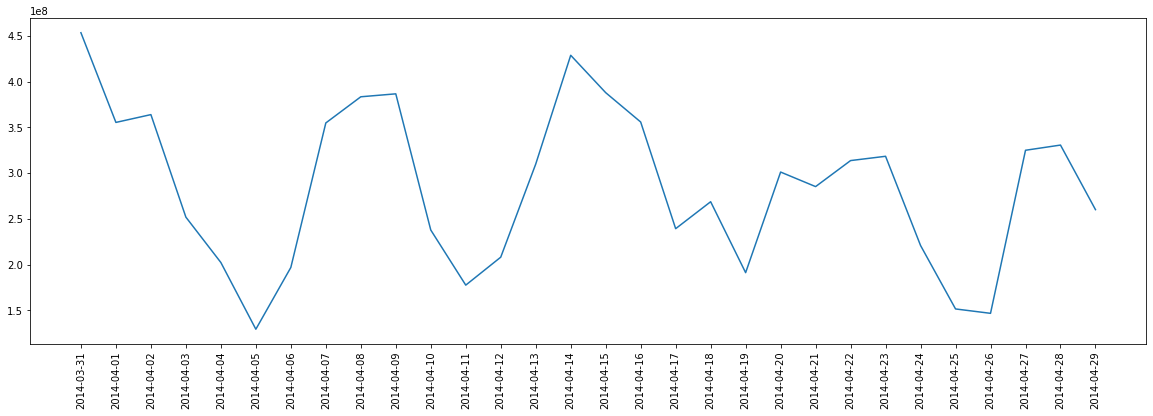

In [ ]:
# 只抽取2014-04-01到2014-08-31的数据
purchase2 = purchase[(purchase.index >= '2014-04-01') & (purchase.index <= '2014-04-30')]
redeem2 = redeem[(redeem.index >= '2014-04-01') & (redeem.index <= '2014-04-30')]
# 画出4月的走势图
plt.figure(figsize=(20, 6))
plt.plot(purchase2.total_purchase_amt)
date_range = pd.date_range('2014-04-01','2014-04-30')
plt.xticks(date_range, rotation=90)

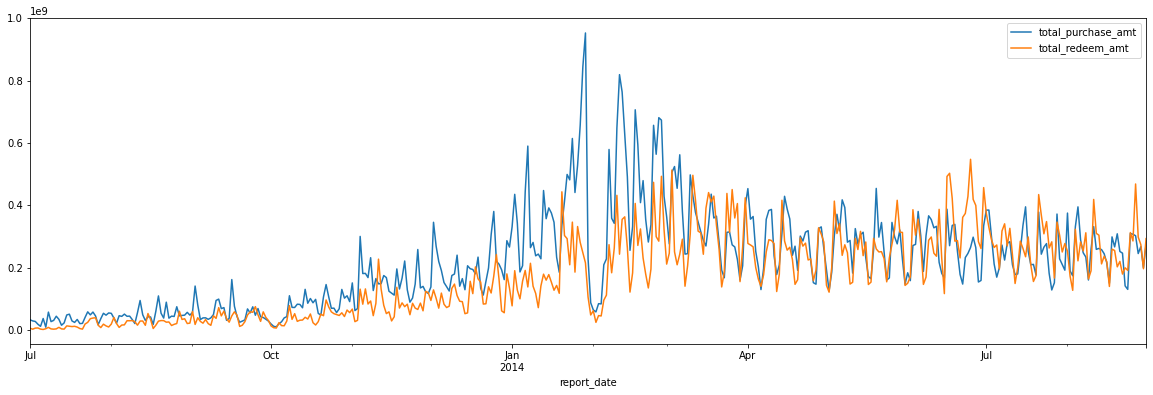

(-7.947102224652337,
 3.198186862488301e-12,
 18,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 15918.844657651942)

In [ ]:
#看时间序列的平稳性
total_balance.plot(figsize=(20,6)) #因为我们只要预测申购量和赎回量，取出每天两者的数据对其进行时间序列的拟合回归。
plt.show()

# 进行一阶差分
diff1= purchase.diff(1)
sm.tsa.stattools.adfuller(diff1[1:]) # 因为第一个数据为NaN

In [ ]:
%%time
from statsmodels.tsa.arima_model import ARIMA
# 选择合适的pq值
model = ARIMA(purchase,order=(7,1,5)).fit()
# 对购买进行预测, 使用typ='levels' 进行原数据的模型预测值
purchase_pred = model.predict('2014-09-01', '2014-09-30',typ='levels')
purchase_pred

/home/admin/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/admin/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2014-09-01    3.310534e+08
2014-09-02    3.318783e+08
2014-09-03    3.338918e+08
2014-09-04    2.983199e+08
2014-09-05    2.407512e+08
2014-09-06    2.266123e+08
2014-09-07    2.435551e+08
2014-09-08    2.970861e+08
2014-09-09    3.321285e+08
2014-09-10    3.265214e+08
2014-09-11    2.916844e+08
2014-09-12    2.392704e+08
2014-09-13    2.253533e+08
2014-09-14    2.475279e+08
2014-09-15    2.950937e+08
2014-09-16    3.345018e+08
2014-09-17    3.280839e+08
2014-09-18    2.927104e+08
2014-09-19    2.448965e+08
2014-09-20    2.275697e+08
2014-09-21    2.530215e+08
2014-09-22    2.980722e+08
2014-09-23    3.366757e+08
2014-09-24    3.321968e+08
2014-09-25    2.947116e+08
2014-09-26    2.505377e+08
2014-09-27    2.318256e+08
2014-09-28    2.574454e+08
2014-09-29    3.025704e+08
2014-09-30    3.387032e+08
Freq: D, dtype: float64

In [ ]:
diff1= redeem.diff(1)
sm.tsa.stattools.adfuller(diff1[1:])

(-11.69198690696878,
 1.6443717458502964e-21,
 12,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15779.04993673871)

In [ ]:
%%time
# 对Redeem进行ARIMA建模
model = ARIMA(redeem,order=(7,1,5)).fit()
redeem_pred = model.predict('2014-09-01', '2014-09-30',typ='levels')
redeem_pred

/home/admin/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/admin/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/admin/.local/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


2014-09-01    3.169083e+08
2014-09-02    3.372493e+08
2014-09-03    3.632422e+08
2014-09-04    3.074690e+08
2014-09-05    2.628035e+08
2014-09-06    2.258773e+08
2014-09-07    2.592204e+08
2014-09-08    3.115534e+08
2014-09-09    3.477479e+08
2014-09-10    3.562424e+08
2014-09-11    3.092731e+08
2014-09-12    2.598503e+08
2014-09-13    2.339171e+08
2014-09-14    2.578253e+08
2014-09-15    3.125563e+08
2014-09-16    3.537287e+08
2014-09-17    3.573617e+08
2014-09-18    3.146178e+08
2014-09-19    2.626591e+08
2014-09-20    2.387490e+08
2014-09-21    2.616250e+08
2014-09-22    3.157238e+08
2014-09-23    3.588165e+08
2014-09-24    3.611533e+08
2014-09-25    3.197918e+08
2014-09-26    2.672032e+08
2014-09-27    2.432886e+08
2014-09-28    2.661253e+08
2014-09-29    3.197193e+08
2014-09-30    3.635532e+08
Freq: D, dtype: float64

In [ ]:
model.aic

16519.28404234372

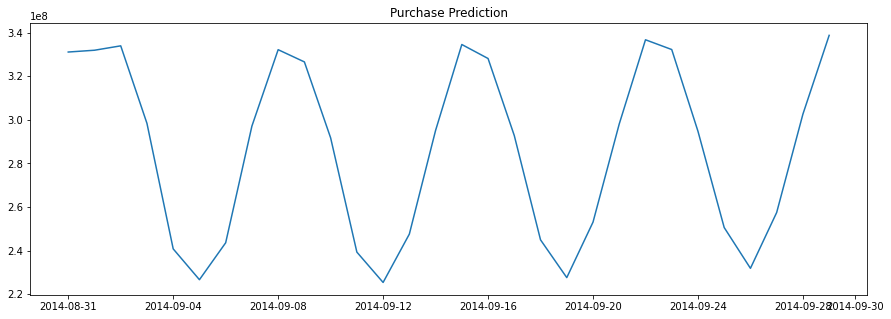

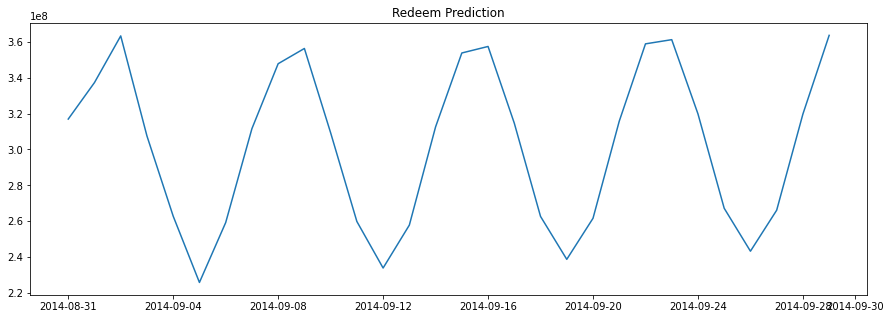

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Purchase Prediction')
plt.plot(purchase_pred)
plt.show()

plt.figure(figsize=(15,5))
plt.title('Redeem Prediction')
plt.plot(redeem_pred)
plt.show()

In [ ]:
result= pd.DataFrame()
result['report_date'] = purchase_pred.index
result['total_purchase_amt']=purchase_pred.values
result['total_redeem_amt']=redeem_pred.values
result

,report_date,total_purchase_amt,total_redeem_amt
0,2014-09-01,3.310534e+08,3.169083e+08
1,2014-09-02,3.318783e+08,3.372493e+08
2,2014-09-03,3.338918e+08,3.632422e+08
3,2014-09-04,2.983199e+08,3.074690e+08
4,2014-09-05,2.407512e+08,2.628035e+08
5,2014-09-06,2.266123e+08,2.258773e+08
6,2014-09-07,2.435551e+08,2.592204e+08
7,2014-09-08,2.970861e+08,3.115534e+08
8,2014-09-09,3.321285e+08,3.477479e+08
9,2014-09-10,3.265214e+08,3.562424e+08


In [ ]:
result['report_date'] = result['report_date'].apply(lambda x: str(x).replace('-', '')[:8])
result.to_csv("baseline_arima.csv", header=None, index=None)
result

,report_date,total_purchase_amt,total_redeem_amt
0,20140901,3.310534e+08,3.169083e+08
1,20140902,3.318783e+08,3.372493e+08
2,20140903,3.338918e+08,3.632422e+08
3,20140904,2.983199e+08,3.074690e+08
4,20140905,2.407512e+08,2.628035e+08
5,20140906,2.266123e+08,2.258773e+08
6,20140907,2.435551e+08,2.592204e+08
7,20140908,2.970861e+08,3.115534e+08
8,20140909,3.321285e+08,3.477479e+08
9,20140910,3.265214e+08,3.562424e+08
